In [8]:
import torch
import pandas as pd
import numpy as np
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import NaNLabelEncoder
from pytorch_forecasting.metrics import QuantileLoss
from sklearn.preprocessing import MinMaxScaler

In [110]:
BTC_Dataset = pd.read_csv('datasets/BTC-USD.csv')
Gold_Dataset = pd.read_csv('datasets/Gold Price.csv')
Google_Trends_Dataset = pd.read_csv('datasets/google_trends.csv')
Interest_Rate_Dataset = pd.read_csv('datasets/Interest_rate.csv')
VIX_Dataset = pd.read_csv('datasets/vix_historical.csv')

In [66]:
BTC_Dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-28,10203.426758,10279.366211,9716.656250,9754.422852,9754.422852,17603790323
1,2019-08-29,9756.786133,9756.786133,9421.629883,9510.200195,9510.200195,17045878501
2,2019-08-30,9514.844727,9656.124023,9428.302734,9598.173828,9598.173828,13595263986
3,2019-08-31,9597.539063,9673.220703,9531.799805,9630.664063,9630.664063,11454806419
4,2019-09-01,9630.592773,9796.755859,9582.944336,9757.970703,9757.970703,11445355859


preprocessing steps
    Fill NaN values
    Drop unwanted Columns
    Convert Data types
    Fill missing dates and value with prev values (if necessary)
    set same date range (if necessary)
    change the date format (if necessary)
    remove dates after 2024-08-28 (if necessary)
    Reverse the order (if necessary)

In [67]:
BTC_Dataset = BTC_Dataset.drop(['Open', 'High', 'Low', 'Adj Close'], axis=1)

In [68]:
BTC_Dataset.tail()

,Date,Close,Volume
1823,2024-08-24,64178.992188,21430585163
1824,2024-08-25,64333.542969,18827683555
1825,2024-08-26,62880.660156,27682040631
1826,2024-08-27,59504.132813,39103882198
1827,2024-08-28,59621.035156,42965946368


In [69]:
BTC_Dataset.head()

,Date,Close,Volume
0,2019-08-28,9754.422852,17603790323
1,2019-08-29,9510.200195,17045878501
2,2019-08-30,9598.173828,13595263986
3,2019-08-31,9630.664063,11454806419
4,2019-09-01,9757.970703,11445355859


In [70]:
total_nan = BTC_Dataset.isna().sum().sum()
print("Total number of NaN values in DataFrame:", total_nan)

Total number of NaN values in DataFrame: 0


In [71]:
print(BTC_Dataset.dtypes)

Date       object
Close     float64
Volume      int64
dtype: object


In [72]:
# convert date data type
BTC_Dataset['Date'] = pd.to_datetime(BTC_Dataset['Date'])

In [73]:
BTC_Dataset = BTC_Dataset.drop(BTC_Dataset.index[-1])

In [74]:
BTC_Dataset.tail()

,Date,Close,Volume
1822,2024-08-23,64094.355469,42530509233
1823,2024-08-24,64178.992188,21430585163
1824,2024-08-25,64333.542969,18827683555
1825,2024-08-26,62880.660156,27682040631
1826,2024-08-27,59504.132813,39103882198


GOLD Dataset

In [75]:
Gold_Dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/01/2024,"2,761.95","2,756.60","2,767.40","2,754.50",NaN,0.46%
1,10/31/2024,"2,749.30","2,799.10","2,801.20","2,741.80",242.57K,-1.84%
2,10/30/2024,"2,800.80","2,786.90","2,801.80","2,782.40",191.55K,1.16%
3,10/29/2024,"2,768.80","2,741.90","2,773.20","2,741.90",0.85K,0.92%
4,10/28/2024,"2,743.60","2,739.40","2,745.60","2,725.80",0.57K,0.05%


In [76]:
Gold_Dataset = Gold_Dataset.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1)
Gold_Dataset.head()

,Date,Price
0,11/01/2024,"2,761.95"
1,10/31/2024,"2,749.30"
2,10/30/2024,"2,800.80"
3,10/29/2024,"2,768.80"
4,10/28/2024,"2,743.60"


In [77]:
Gold_Dataset.head()

,Date,Price
0,11/01/2024,"2,761.95"
1,10/31/2024,"2,749.30"
2,10/30/2024,"2,800.80"
3,10/29/2024,"2,768.80"
4,10/28/2024,"2,743.60"


In [78]:
# reverse the order
Gold_Dataset = Gold_Dataset.iloc[::-1].reset_index(drop=True)
Gold_Dataset.head()

,Date,Price
0,08/28/2019,"1,542.80"
1,08/29/2019,"1,533.70"
2,08/30/2019,"1,526.20"
3,09/02/2019,"1,555.90"
4,09/03/2019,"1,552.80"


In [79]:
# format date type
Gold_Dataset['Date'] = pd.to_datetime(Gold_Dataset['Date']).dt.strftime('%Y-%m-%d')
Gold_Dataset.head()

,Date,Price
0,2019-08-28,"1,542.80"
1,2019-08-29,"1,533.70"
2,2019-08-30,"1,526.20"
3,2019-09-02,"1,555.90"
4,2019-09-03,"1,552.80"


In [80]:
print(Gold_Dataset.dtypes)

Date     object
Price    object
dtype: object


In [81]:
# convert data types
Gold_Dataset['Date'] = pd.to_datetime(Gold_Dataset['Date'])
Gold_Dataset['Price'] = Gold_Dataset['Price'].str.replace(',', '').astype(float)

In [82]:
print(Gold_Dataset.dtypes)

Date     datetime64[ns]
Price           float64
dtype: object


In [83]:
Gold_Dataset.tail()

,Date,Price
1333,2024-10-28,2743.60
1334,2024-10-29,2768.80
1335,2024-10-30,2800.80
1336,2024-10-31,2749.30
1337,2024-11-01,2761.95


In [84]:
# check for NaN values
total_nan = Gold_Dataset.isna().sum().sum()
print("Total number of NaN values in DataFrame:", total_nan)

Total number of NaN values in DataFrame: 0


In [85]:
# remove unwanted dates
start_date = '2024-08-28'
end_date = '2024-11-01'

# Filter out rows within the specified date range
Gold_Dataset = Gold_Dataset[~((Gold_Dataset['Date'] >= start_date) & (Gold_Dataset['Date'] <= end_date))]

In [86]:
Gold_Dataset.tail()

,Date,Price
1286,2024-08-21,2524.1
1287,2024-08-22,2493.5
1288,2024-08-23,2522.6
1289,2024-08-26,2531.4
1290,2024-08-27,2529.3


In [95]:
Gold_Dataset.set_index('Date', inplace=True)

# Create a complete date range from the minimum to maximum date in the dataset
all_dates = pd.date_range(start=Gold_Dataset.index.min(), end=Gold_Dataset.index.max())

# Reindex the DataFrame to include all dates, filling missing dates with NaN
Gold_Dataset = Gold_Dataset.reindex(all_dates)

# Forward-fill missing 'Price' values without using 'inplace'
Gold_Dataset['Price'] = Gold_Dataset['Price'].ffill()

# Reset the index to make 'Date' a column again
Gold_Dataset.reset_index(inplace=True)
Gold_Dataset.rename(columns={'index': 'Date'}, inplace=True)

In [96]:
Gold_Dataset.tail()

,Date,Price
1822,2024-08-23,2522.6
1823,2024-08-24,2522.6
1824,2024-08-25,2522.6
1825,2024-08-26,2531.4
1826,2024-08-27,2529.3


Interest Rate

In [97]:
Interest_Rate_Dataset.tail()

,DATE,DFF
1822,2024-08-23,5.33
1823,2024-08-24,5.33
1824,2024-08-25,5.33
1825,2024-08-26,5.33
1826,2024-08-27,5.33


In [98]:
Interest_Rate_Dataset = Interest_Rate_Dataset.rename(columns={'DFF': 'Interest Rate'})

In [99]:
Interest_Rate_Dataset = Interest_Rate_Dataset.rename(columns={'DATE': 'Date'})

In [100]:
Interest_Rate_Dataset.dtypes

Date              object
Interest Rate    float64
dtype: object

In [101]:
Interest_Rate_Dataset['Date'] = pd.to_datetime(Interest_Rate_Dataset['Date'])

VIX Data

In [111]:
VIX_Dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1298,2024-08-19,15.940000,16.070000,14.46,14.650000,14.650000,0.0
1299,2024-08-20,14.890000,15.930000,14.78,15.880000,15.880000,0.0
1300,2024-08-21,16.250000,17.170000,15.92,16.270000,16.270000,0.0
1301,2024-08-22,16.270000,18.059999,15.76,17.549999,17.549999,0.0
1302,2024-08-23,17.120001,17.209999,15.61,15.860000,15.860000,0.0


In [112]:
# drop columns
VIX_Dataset = VIX_Dataset.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
VIX_Dataset.head()

,Date,Close
0,2019-08-28,19.350000
1,2019-08-29,17.879999
2,2019-08-30,18.980000
3,2019-09-02,NaN
4,2019-09-03,19.660000


In [113]:
# handle NaN values
total_nan = VIX_Dataset.isna().sum().sum()
print("Total number of NaN values in DataFrame:", total_nan)

Total number of NaN values in DataFrame: 47


In [114]:
VIX_Dataset['Close'] = VIX_Dataset['Close'].ffill()

In [115]:
VIX_Dataset.tail()

,Date,Close
1298,2024-08-19,14.650000
1299,2024-08-20,15.880000
1300,2024-08-21,16.270000
1301,2024-08-22,17.549999
1302,2024-08-23,15.860000


In [118]:
VIX_Dataset.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [117]:
VIX_Dataset['Date'] = pd.to_datetime(VIX_Dataset['Date'])

In [119]:
VIX_Dataset.set_index('Date', inplace=True)

# Create a complete date range from the minimum to maximum date in the dataset
all_dates = pd.date_range(start=VIX_Dataset.index.min(), end=VIX_Dataset.index.max())

# Reindex the DataFrame to include all dates, filling missing dates with NaN
VIX_Dataset = VIX_Dataset.reindex(all_dates)

# Forward-fill missing 'Price' values without using 'inplace'
VIX_Dataset['Close'] = VIX_Dataset['Close'].ffill()

# Reset the index to make 'Date' a column again
VIX_Dataset.reset_index(inplace=True)
VIX_Dataset.rename(columns={'index': 'Date'}, inplace=True)

In [120]:
VIX_Dataset.tail()

,Date,Close
1818,2024-08-19,14.650000
1819,2024-08-20,15.880000
1820,2024-08-21,16.270000
1821,2024-08-22,17.549999
1822,2024-08-23,15.860000


remove unwanted dates from all data frames

In [131]:
VIX_Dataset.tail()

,Date,Close
1818,2024-08-19,14.650000
1819,2024-08-20,15.880000
1820,2024-08-21,16.270000
1821,2024-08-22,17.549999
1822,2024-08-23,15.860000


In [129]:
start_date = '2024-08-24'
end_date = '2024-08-27'

# Filter out rows within the specified date range
Interest_Rate_Dataset = Interest_Rate_Dataset[~((Interest_Rate_Dataset['Date'] >= start_date) & (Interest_Rate_Dataset['Date'] <= end_date))]

In [132]:
VIX_Dataset.describe()

,Date,Close
count,1823,1823.000000
mean,2022-02-24 00:00:00,21.065222
min,2019-08-28 00:00:00,11.540000
25%,2020-11-25 12:00:00,15.145000
50%,2022-02-24 00:00:00,19.190001
75%,2023-05-25 12:00:00,24.775001
max,2024-08-23 00:00:00,82.690002
std,NaN,8.257763


In [133]:
Final_DataFrame = BTC_Dataset.merge(Gold_Dataset, on='Date', how='outer')\
                .merge(Interest_Rate_Dataset, on='Date', how='outer')\
                .merge(VIX_Dataset, on='Date', how='outer')

In [136]:
Final_DataFrame.tail()

,Date,BTC_Close,Volume,Price,Interest Rate,VIX_Close
1818,2024-08-19,59493.453125,25911207712,2518.1,5.33,14.650000
1819,2024-08-20,59012.792969,31613400008,2527.4,5.33,15.880000
1820,2024-08-21,61175.191406,32731154072,2524.1,5.33,16.270000
1821,2024-08-22,60381.914063,27625734377,2493.5,5.33,17.549999
1822,2024-08-23,64094.355469,42530509233,2522.6,5.33,15.860000


In [135]:
Final_DataFrame = Final_DataFrame.rename(columns={'Close_y': 'VIX_Close', 'Close_x': 'BTC_Close'})

In [137]:
Final_DataFrame = Final_DataFrame.rename(columns={'Volume': 'BTC_Volume', 'BTC_Close': 'BTC_Price', 'Price': 'Gold_Price'})

In [138]:
Final_DataFrame

,Date,BTC_Price,BTC_Volume,Gold_Price,Interest Rate,VIX_Close
0,2019-08-28,9754.422852,17603790323,1542.8,2.12,19.350000
1,2019-08-29,9510.200195,17045878501,1533.7,2.12,17.879999
2,2019-08-30,9598.173828,13595263986,1526.2,2.13,18.980000
3,2019-08-31,9630.664063,11454806419,1526.2,2.13,18.980000
4,2019-09-01,9757.970703,11445355859,1526.2,2.13,18.980000
...,...,...,...,...,...,...
1818,2024-08-19,59493.453125,25911207712,2518.1,5.33,14.650000
1819,2024-08-20,59012.792969,31613400008,2527.4,5.33,15.880000
1820,2024-08-21,61175.191406,32731154072,2524.1,5.33,16.270000
1821,2024-08-22,60381.914063,27625734377,2493.5,5.33,17.549999


In [139]:
# Scale features (0,1) using MinMaxScaler for faster convergence
scaler = MinMaxScaler()
Final_DataFrame[Final_DataFrame.columns] = scaler.fit_transform(Final_DataFrame[Final_DataFrame.columns])

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>)

In [109]:
Final_DataFrame.dtypes

Date             datetime64[ns]
BTC_Price               float64
BTC_Volume                int64
Gold_Price              float64
Interest Rate           float64
VIX_Close               float64
dtype: object

In [110]:
Final_DataFrame['BTC_Volume'] = Final_DataFrame['BTC_Volume'].str.replace(',', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [142]:
# Separate the DateTime columns and numeric columns
date_columns = Final_DataFrame.select_dtypes(include=['datetime64']).columns
numeric_columns = Final_DataFrame.select_dtypes(include=['float64', 'int64']).columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale only the numeric columns
Final_DataFrame[numeric_columns] = scaler.fit_transform(Final_DataFrame[numeric_columns])

In [143]:
Final_DataFrame

,Date,BTC_Price,BTC_Volume,Gold_Price,Interest Rate,VIX_Close
0,2019-08-28,0.070231,0.035507,0.079985,0.393195,0.109768
1,2019-08-29,0.066646,0.033893,0.071482,0.393195,0.089108
2,2019-08-30,0.067937,0.023910,0.064474,0.395085,0.104568
3,2019-08-31,0.068414,0.017717,0.064474,0.395085,0.104568
4,2019-09-01,0.070283,0.017690,0.064474,0.395085,0.104568
...,...,...,...,...,...,...
1818,2024-08-19,0.800477,0.059542,0.991310,1.000000,0.043710
1819,2024-08-20,0.793420,0.076040,1.000000,1.000000,0.060998
1820,2024-08-21,0.825168,0.079274,0.996916,1.000000,0.066479
1821,2024-08-22,0.813521,0.064503,0.968324,1.000000,0.084469


In [144]:
import pandas as pd
import numpy as np
import pytorch_lightning as pl
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.metrics import QuantileLoss
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
import torch

In [155]:
def prepare_data(df):
    """Prepare data for TFT model"""
    # Ensure datetime index
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    
    # Add time index for the model
    df['time_idx'] = range(len(df))
    
    # Add additional time features
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['day_of_week'] = df.index.dayofweek
    
    # Create a static categorical group ID
    df['group'] = 'BTC'  # Since we're only predicting BTC
    
    return df

In [148]:
Final_DataFrame.columns

Index(['Date', 'BTC_Price', 'BTC_Volume', 'Gold_Price', 'Interest Rate',
       'VIX_Close'],
      dtype='object')

In [149]:
def create_datasets(df, max_prediction_length=30, max_encoder_length=90):
    """Create training and validation datasets"""
    
    training_cutoff = df['time_idx'].max() - max_prediction_length
    
    # Configure the dataset
    training = TimeSeriesDataSet(
        data=df[lambda x: x.time_idx <= training_cutoff],
        time_idx="time_idx",
        target="BTC_Price",
        group_ids=["group"],
        min_encoder_length=max_encoder_length // 2,
        max_encoder_length=max_encoder_length,
        min_prediction_length=max_prediction_length // 2,
        max_prediction_length=max_prediction_length,
        static_categoricals=["group"],
        time_varying_known_categoricals=["month", "year", "day_of_week"],
        time_varying_known_reals=["time_idx"],
        time_varying_unknown_reals=[
            "BTC_Price",
            # Add your exogenous variables here
            "BTC_Volume",
            "Gold_Price",
            "Interest Rate",
            "VIX_Close"
            # Add more variables as needed
        ],
        target_normalizer="standard",
    )
    
    # Create validation dataset
    validation = TimeSeriesDataSet.from_dataset(
        training,
        df,
        min_prediction_idx=training_cutoff + 1,
        stop_randomization=True
    )
    
    # Create data loaders
    batch_size = 64
    train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
    val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)
    
    return training, train_dataloader, val_dataloader

In [150]:
def train_model(train_dataloader, val_dataloader, training):
    """Train the Temporal Fusion Transformer model"""
    
    # Configure the model
    tft = TemporalFusionTransformer.from_dataset(
        training,
        learning_rate=0.001,
        hidden_size=64,
        attention_head_size=4,
        dropout=0.1,
        hidden_continuous_size=32,
        loss=QuantileLoss(),
        log_interval=10,
        reduce_on_plateau_patience=4
    )
    
    # Configure training
    trainer = pl.Trainer(
        max_epochs=100,
        accelerator='gpu' if torch.cuda.is_available() else 'cpu',
        gradient_clip_val=0.1,
        limit_train_batches=50,
        callbacks=[
            EarlyStopping(monitor="val_loss", patience=10, mode="min"),
            LearningRateMonitor("epoch")
        ],
    )
    
    # Train the model
    trainer.fit(
        tft,
        train_dataloaders=train_dataloader,
        val_dataloaders=val_dataloader
    )
    
    return tft, trainer

In [159]:
def main():
  
    # Prepare the data
    processed_df = prepare_data(Final_DataFrame)
    
    # Create datasets
    training, train_dataloader, val_dataloader = create_datasets(processed_df)
    
    # Train the model
    model, trainer = train_model(train_dataloader, val_dataloader, training)
    
    # Save the trained model
    trainer.save_checkpoint("crypto_tft_model.ckpt")
    
    return model, trainer


In [160]:
if __name__ == "__main__":
    model, trainer = main()

AssertionError: target_normalizer has to be either None or of class TorchNormalizer but found standard

In [169]:
import pandas as pd
import numpy as np
import pytorch_lightning as pl
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters
from pytorch_forecasting.metrics import QuantileLoss, MAE, RMSE
from pytorch_forecasting.data import GroupNormalizer
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
import torch

# Data preprocessing function
def prepare_data(df):
    """Prepare data for TFT model"""
    # Ensure datetime index
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    
    # Add time index for the model
    df['time_idx'] = range(len(df))
    
    # Add additional time features and convert to string type for categorical variables
    df['month'] = df.index.month.astype(str)
    df['year'] = df.index.year.astype(str)
    df['day_of_week'] = df.index.dayofweek.astype(str)
    
    # Create a static categorical group ID
    df['group'] = 'BTC'  # Since we're only predicting BTC
    
    # Convert column names with spaces to underscores
    df.columns = df.columns.str.replace(' ', '_')
    
    # Ensure all required columns exist and handle missing values
    required_columns = ['BTC_Price', 'BTC_Volume', 'Gold_Price', 'Interest_Rate', 'VIX_Close']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Required column {col} not found in dataset")
        # Forward fill missing values
        df[col] = df[col].ffill().bfill()
    
    return df

# Model training setup
def create_datasets(df, max_prediction_length=30, max_encoder_length=90):
    """Create training and validation datasets"""
    
    training_cutoff = df['time_idx'].max() - max_prediction_length
    
    # Configure the dataset
    training = TimeSeriesDataSet(
        data=df[lambda x: x.time_idx <= training_cutoff],
        time_idx="time_idx",
        target="BTC_Price",
        group_ids=["group"],
        min_encoder_length=max_encoder_length // 2,
        max_encoder_length=max_encoder_length,
        min_prediction_length=max_prediction_length // 2,
        max_prediction_length=max_prediction_length,
        static_categoricals=["group"],
        time_varying_known_categoricals=["month", "year", "day_of_week"],
        time_varying_known_reals=["time_idx"],
        time_varying_unknown_reals=[
            "BTC_Price",
            "BTC_Volume",
            "Gold_Price",
            "Interest_Rate",
            "VIX_Close"
        ],
        target_normalizer=GroupNormalizer(
            groups=["group"], 
            method="standard",
            center=True,
            scale_by_group=True
        ),
        add_relative_time_idx=True,
        add_target_scales=True,
        add_encoder_length=True,
    )
    
    # Create validation dataset
    validation = TimeSeriesDataSet.from_dataset(
        training,
        df,
        min_prediction_idx=training_cutoff + 1,
        stop_randomization=True
    )
    
    # Create data loaders
    batch_size = 64
    train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
    val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)
    
    return training, train_dataloader, val_dataloader

class CryptoTFT(pl.LightningModule):
    def __init__(self, training_dataset):
        super().__init__()
        self.model = TemporalFusionTransformer.from_dataset(
            training_dataset,
            learning_rate=0.001,
            hidden_size=64,
            attention_head_size=4,
            dropout=0.1,
            hidden_continuous_size=32,
            loss=QuantileLoss(),
            log_interval=10,
            reduce_on_plateau_patience=4,
            logging_metrics=torch.nn.ModuleList([RMSE(), MAE(), QuantileLoss()]),
        )
    
    def forward(self, x):
        return self.model(x)
    
    def training_step(self, batch, batch_idx):
        return self.model.training_step(batch, batch_idx)
    
    def validation_step(self, batch, batch_idx):
        return self.model.validation_step(batch, batch_idx)
    
    def configure_optimizers(self):
        return self.model.configure_optimizers()

def train_model(train_dataloader, val_dataloader, training):
    """Train the Temporal Fusion Transformer model"""
    
    # Initialize model
    model = CryptoTFT(training)
    
    # Configure training
    trainer = pl.Trainer(
        max_epochs=100,
        accelerator='gpu' if torch.cuda.is_available() else 'cpu',
        devices=1,
        gradient_clip_val=0.1,
        limit_train_batches=50,
        callbacks=[
            EarlyStopping(monitor="val_loss", patience=10, mode="min"),
            LearningRateMonitor("epoch")
        ],
    )
    
    # Train the model
    trainer.fit(
        model,
        train_dataloaders=train_dataloader,
        val_dataloaders=val_dataloader
    )
    
    return model, trainer

In [165]:
def main():
    # Assuming df is your input DataFrame
    # df = pd.read_csv('your_crypto_data.csv')
    
    # Prepare the data
    processed_df = prepare_data(Final_DataFrame)
    
    # Create datasets
    training, train_dataloader, val_dataloader = create_datasets(processed_df)
    
    # Train the model
    model, trainer = train_model(train_dataloader, val_dataloader, training)
    
    # Save the trained model
    trainer.save_checkpoint("crypto_tft_model.ckpt")
    
    return model, trainer

In [170]:
if __name__ == "__main__":
    model, trainer = main()

C:\Users\Sathmika\anaconda3\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
C:\Users\Sathmika\anaconda3\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
C:\Users\Sathmika\anaconda3\Lib\site-packages\pytorch_forecasting\models\temporal_fusion_transformer\__init__.py:143: UserWarning: In pytorch-forecasting models, on versions 1.1.X, the default optimizer defaults to 'adam', if pytorch_optimizer is not installed, otherwise it defaults to 'ranger' from pytorch_optimizer. From version 1.2.0, the default optimizer will be 'adam' regardless of whether pytorch_optimizer is installed, in order to minim

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

C:\Users\Sathmika\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


RuntimeError: TemporalFusionTransformer is not attached to a `Trainer`.

In [ ]:
# Function to make predictions
def make_predictions(model, training, df, max_encoder_length=90, days_to_predict=30):
    """Make predictions using the trained model"""
    # Create prediction dataset
    encoder_data = df[lambda x: x.time_idx > x.time_idx.max() - max_encoder_length]
    
    # Make predictions
    predictions = model.predict(
        encoder_data,
        mode="prediction",
        return_x=True
    )
    
    return predictions

In [173]:
pip install pytorch-lightning pytorch-forecasting pandas numpy torch

In [198]:
import pandas as pd
import numpy as np
# import pytorch_lightning as pl
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks import LearningRateMonitor
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.metrics import QuantileLoss, MAE, RMSE
from pytorch_forecasting.data import GroupNormalizer
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
import torch
from typing import Tuple, Dict, Any

class CryptoTFT(pl.LightningModule):
    def __init__(self, training_dataset: TimeSeriesDataSet):
        super().__init__()
        self.training_dataset = training_dataset
        
        # Create loss function
        self.loss_fn = QuantileLoss()
        
        # Create model parameters
        self.model_params = dict(
            learning_rate=0.001,
            hidden_size=64,
            attention_head_size=4,
            dropout=0.1,
            hidden_continuous_size=32,
            log_interval=10,
            reduce_on_plateau_patience=4
        )
        
        # Save hyperparameters while ignoring nn.Modules
        self.save_hyperparameters(ignore=['loss_fn'])
        
        # Initialize TFT model
        self.model = TemporalFusionTransformer.from_dataset(
            training_dataset,
            loss=self.loss_fn,  # Pass loss function directly
            **self.model_params
        )
    
    def forward(self, x: Dict[str, Any]):
        return self.model(x)
    
    def training_step(self, batch: Any, batch_idx: int) -> torch.Tensor:
        # Get network predictions and calculate loss
        outputs = self(batch)
        loss = self.loss_fn(outputs.predictions, batch['target'])
        
        # Log metrics
        self.log(
            "train_loss",
            loss,
            on_step=True,
            on_epoch=True,
            prog_bar=True,
            batch_size=len(batch['target'])
        )
        return loss
    
    def validation_step(self, batch: Any, batch_idx: int) -> torch.Tensor:
        # Get network predictions and calculate loss
        outputs = self(batch)
        loss = self.loss_fn(outputs.predictions, batch['target'])
        
        # Log metrics
        self.log(
            "val_loss",
            loss,
            on_step=True,
            on_epoch=True,
            prog_bar=True,
            batch_size=len(batch['target'])
        )
        return loss
    
    def configure_optimizers(self):
        """Configure optimizers and learning rate schedulers"""
        optimizer = torch.optim.Adam(
            self.parameters(),
            lr=self.model_params['learning_rate']
        )
        
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer,
            mode="min",
            factor=0.1,
            patience=self.model_params['reduce_on_plateau_patience'],
            verbose=True
        )
        
        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": scheduler,
                "monitor": "val_loss",
                "interval": "epoch"
            }
        }
    
    def predict_step(self, batch: Any, batch_idx: int, dataloader_idx: int = 0) -> torch.Tensor:
        """Override predict step for consistent prediction handling"""
        outputs = self(batch)
        return outputs.predictions

def prepare_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Prepare data for TFT model with improved error handling
    """
    try:
        # Ensure datetime index
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.set_index('Date')
        
        # Add time index for the model
        df['time_idx'] = range(len(df))
        
        # Add additional time features
        df['month'] = df.index.month.astype(str)
        df['year'] = df.index.year.astype(str)
        df['day_of_week'] = df.index.dayofweek.astype(str)
        
        # Create a static categorical group ID
        df['group'] = 'BTC'
        
        # Convert column names with spaces to underscores
        df.columns = df.columns.str.replace(' ', '_')
        
        # Check and handle required columns
        required_columns = ['BTC_Price', 'BTC_Volume', 'Gold_Price', 'Interest_Rate', 'VIX_Close']
        missing_columns = [col for col in required_columns if col not in df.columns]
        
        if missing_columns:
            raise ValueError(f"Missing required columns: {missing_columns}")
        
        # Forward fill missing values and check for remaining NaNs
        df[required_columns] = df[required_columns].ffill().bfill()
        
        if df.isna().any().any():
            raise ValueError("Dataset contains NaN values after forward/backward filling")
            
        return df
        
    except Exception as e:
        raise RuntimeError(f"Error in data preparation: {str(e)}")

def create_datasets(
    df: pd.DataFrame,
    max_prediction_length: int = 30,
    max_encoder_length: int = 90
) -> Tuple[TimeSeriesDataSet, TimeSeriesDataSet]:
    """
    Create training and validation datasets with improved error handling
    """
    try:
        training_cutoff = df['time_idx'].max() - max_prediction_length
        
        training = TimeSeriesDataSet(
            data=df[lambda x: x.time_idx <= training_cutoff],
            time_idx="time_idx",
            target="BTC_Price",
            group_ids=["group"],
            min_encoder_length=max_encoder_length // 2,
            max_encoder_length=max_encoder_length,
            min_prediction_length=max_prediction_length // 2,
            max_prediction_length=max_prediction_length,
            static_categoricals=["group"],
            time_varying_known_categoricals=["month", "year", "day_of_week"],
            time_varying_known_reals=["time_idx"],
            time_varying_unknown_reals=[
                "BTC_Price",
                "BTC_Volume",
                "Gold_Price",
                "Interest_Rate",
                "VIX_Close"
            ],
            target_normalizer=GroupNormalizer(
                groups=["group"],
                method="standard",
                center=True,
                scale_by_group=True
            ),
            add_relative_time_idx=True,
            add_target_scales=True,
            add_encoder_length=True,
        )
        
        validation = TimeSeriesDataSet.from_dataset(
            training,
            df,
            min_prediction_idx=training_cutoff + 1,
            stop_randomization=True
        )
        
        return training, validation
        
    except Exception as e:
        raise RuntimeError(f"Error in dataset creation: {str(e)}")

def create_dataloaders(
    training: TimeSeriesDataSet,
    validation: TimeSeriesDataSet,
    batch_size: int = 64
) -> Tuple[torch.utils.data.DataLoader, torch.utils.data.DataLoader]:
    """
    Create training and validation dataloaders
    """
    try:
        train_dataloader = training.to_dataloader(
            train=True,
            batch_size=batch_size,
            num_workers=0,
            shuffle=True
        )
        val_dataloader = validation.to_dataloader(
            train=False,
            batch_size=batch_size,
            num_workers=0,
            shuffle=False
        )
        return train_dataloader, val_dataloader
    except Exception as e:
        raise RuntimeError(f"Error creating dataloaders: {str(e)}")

def train_model(
    training: TimeSeriesDataSet,
    train_dataloader: torch.utils.data.DataLoader,
    val_dataloader: torch.utils.data.DataLoader,
    max_epochs: int = 100
) -> Tuple[CryptoTFT, pl.Trainer]:
    """
    Train the Temporal Fusion Transformer model with improved settings
    """
    try:
        # Set random seed for reproducibility
        pl.seed_everything(42, workers=True)
        
        # Initialize model
        model = CryptoTFT(training)
        
        # Configure callbacks
        callbacks = [
            EarlyStopping(
                monitor="val_loss",
                patience=10,
                mode="min",
                verbose=True
            ),
            LearningRateMonitor(logging_interval="epoch")
        ]
        
        # Configure trainer
        trainer = pl.Trainer(
            max_epochs=max_epochs,
            accelerator='auto',
            devices='auto',
            gradient_clip_val=0.1,
            callbacks=callbacks,
            enable_model_summary=True,
            enable_progress_bar=True,
            log_every_n_steps=1
        )
        
        # Train the model
        trainer.fit(
            model,
            train_dataloaders=train_dataloader,
            val_dataloaders=val_dataloader
        )
        
        return model, trainer
        
    except Exception as e:
        raise RuntimeError(f"Error in model training: {str(e)}")

def make_predictions(
    model: CryptoTFT,
    df: pd.DataFrame,
    max_encoder_length: int = 90,
    days_to_predict: int = 30
) -> pd.DataFrame:
    """
    Make predictions using the trained model with improved error handling
    """
    try:
        # Create prediction dataset
        encoder_data = df[lambda x: x.time_idx > x.time_idx.max() - max_encoder_length]
        
        # Create prediction dataloader
        pred_dataloader = TimeSeriesDataSet(
            encoder_data,
            time_idx="time_idx",
            target="BTC_Price",
            group_ids=["group"],
            max_encoder_length=max_encoder_length,
            max_prediction_length=days_to_predict,
            static_categoricals=["group"],
            time_varying_known_categoricals=["month", "year", "day_of_week"],
            time_varying_known_reals=["time_idx"],
            time_varying_unknown_reals=[
                "BTC_Price",
                "BTC_Volume",
                "Gold_Price",
                "Interest_Rate",
                "VIX_Close"
            ],
        ).to_dataloader(train=False, batch_size=128)
        
        # Make predictions
        predictions = []
        model.eval()
        with torch.no_grad():
            for batch in pred_dataloader:
                pred = model.predict_step(batch, 0)
                predictions.append(pred)
        
        # Combine predictions
        all_predictions = torch.cat(predictions, dim=0)
        
        # Convert to DataFrame
        predictions_df = pd.DataFrame(
            all_predictions.numpy(),
            index=encoder_data.index[-days_to_predict:],
            columns=['predicted_price']
        )
        
        return predictions_df
        
    except Exception as e:
        raise RuntimeError(f"Error in making predictions: {str(e)}")

def main(df: pd.DataFrame) -> Tuple[CryptoTFT, pl.Trainer, pd.DataFrame]:
    """
    Main function to run the entire pipeline
    """
    try:
        # Prepare the data
        processed_df = prepare_data(df)
        
        # Create datasets
        training, validation = create_datasets(processed_df)
        
        # Create dataloaders
        train_dataloader, val_dataloader = create_dataloaders(training, validation)
        
        # Train the model
        model, trainer = train_model(training, train_dataloader, val_dataloader)
        
        # Make predictions
        predictions = make_predictions(model, processed_df)
        
        # Save the trained model
        trainer.save_checkpoint("crypto_tft_model.ckpt")
        
        return model, trainer, predictions
        
    except Exception as e:
        raise RuntimeError(f"Error in main pipeline: {str(e)}")


In [183]:
if __name__ == "__main__":
    # Example usage
    try:
        model, trainer, predictions = main(Final_DataFrame)
        print("Model training completed successfully")
        print("\nPredictions:")
        print(predictions.head())
    except Exception as e:
        print(f"Error: {str(e)}")

Seed set to 42
C:\Users\Sathmika\anaconda3\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
C:\Users\Sathmika\anaconda3\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
C:\Users\Sathmika\anaconda3\Lib\site-packages\pytorch_forecasting\models\temporal_fusion_transformer\__init__.py:143: UserWarning: In pytorch-forecasting models, on versions 1.1.X, the default optimizer defaults to 'adam', if pytorch_optimizer is not installed, otherwise it defaults to 'ranger' from pytorch_optimizer. From version 1.2.0, the default optimizer will be 'adam' regardless of whether pytorch_optimizer is installed, in

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Error: Error in main pipeline: Error in model training: tuple indices must be integers or slices, not str


C:\Users\Sathmika\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


In [201]:
import pandas as pd
import torch
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import QuantileLoss
from pytorch_lightning import Trainer
import lightning.pytorch as pl
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks import LearningRateMonitor

In [185]:
Final_DataFrame['time_idx'] = Final_DataFrame.index

In [186]:
# Define dataset parameters
max_prediction_length = 7  # Set to desired prediction length
max_encoder_length = 30  # Set to desired history length (e.g., 30 days)
batch_size = 64  # Adjust based on your hardware

In [189]:
# Define TimeSeriesDataSet
Final_DataFrame['id'] = "BTC"
training_cutoff = Final_DataFrame['time_idx'].max() - max_prediction_length
training = TimeSeriesDataSet(
    Final_DataFrame[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="BTC_Price",
    group_ids=["id"],  # Use "id" as the group identifier
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_reals=[],  # Add any static features if available
    time_varying_known_reals=list(Final_DataFrame.columns.difference(['BTC_Price', 'time_idx', 'id'])),
    time_varying_unknown_reals=["BTC_Price"],
    target_normalizer=GroupNormalizer(groups=["id"]),
)

In [190]:
# Validation set
validation = TimeSeriesDataSet.from_dataset(training, Final_DataFrame, predict=True, stop_randomization=True)

In [191]:
# Data loaders
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)

In [192]:
# Initialize TFT model
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,  # Quantile output
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

C:\Users\Sathmika\anaconda3\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
C:\Users\Sathmika\anaconda3\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
C:\Users\Sathmika\anaconda3\Lib\site-packages\pytorch_forecasting\models\temporal_fusion_transformer\__init__.py:143: UserWarning: In pytorch-forecasting models, on versions 1.1.X, the default optimizer defaults to 'adam', if pytorch_optimizer is not installed, otherwise it defaults to 'ranger' from pytorch_optimizer. From version 1.2.0, the default optimizer will be 'adam' regardless of whether pytorch_optimizer is installed, in order to minim

In [202]:
# Training
# Updated Trainer initialization
trainer = Trainer(
    max_epochs=30, 
    accelerator="gpu" if torch.cuda.is_available() else "cpu", 
    devices=1 if torch.cuda.is_available() else 1  # Use 1 for CPU as well
) 


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [203]:
trainer.fit(tft, train_dataloader, val_dataloader)

TypeError: `model` must be a `LightningModule` or `torch._dynamo.OptimizedModule`, got `TemporalFusionTransformer`

In [204]:
import lightning.pytorch as pl
from lightning.pytorch.loggers import TensorBoardLogger
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
# import dataset, network to train and metric to optimize
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer, QuantileLoss
from lightning.pytorch.tuner import Tuner

In [206]:
# Define dataset parameters
Final_DataFrame['time_idx'] = Final_DataFrame.index
max_prediction_length = 7  # Set to desired prediction length
max_encoder_length = 30  # Set to desired history length (e.g., 30 days)
batch_size = 64 
training_cutoff = Final_DataFrame['time_idx'].max() - max_prediction_length

In [207]:
training = TimeSeriesDataSet(
    Final_DataFrame[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="BTC_Price",
    group_ids=["id"],  # Use "id" as the group identifier
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_reals=[],  # Add any static features if available
    time_varying_known_reals=list(Final_DataFrame.columns.difference(['BTC_Price', 'time_idx', 'id'])),
    time_varying_unknown_reals=["BTC_Price"],
    target_normalizer=GroupNormalizer(groups=["id"]),
)

In [208]:
validation = TimeSeriesDataSet.from_dataset(training, Final_DataFrame, min_prediction_idx=training.index.time.max() + 1, stop_randomization=True)

In [209]:
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=2)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=2)

In [210]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=1, verbose=False, mode="min")
lr_logger = LearningRateMonitor()
trainer = pl.Trainer(
    max_epochs=100,
    accelerator="auto",  # run on CPU, if on multiple GPUs, use strategy="ddp"
    gradient_clip_val=0.1,
    limit_train_batches=30,  # 30 batches per epoch
    callbacks=[lr_logger, early_stop_callback],
    logger=TensorBoardLogger("lightning_logs")
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [211]:
tft = TemporalFusionTransformer.from_dataset(
    # dataset
    training,
    # architecture hyperparameters
    hidden_size=32,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=16,
    # loss metric to optimize
    loss=QuantileLoss(),
    # logging frequency
    log_interval=2,
    # optimizer parameters
    learning_rate=0.03,
    reduce_on_plateau_patience=4
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

Number of parameters in network: 76.1k


C:\Users\Sathmika\anaconda3\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
C:\Users\Sathmika\anaconda3\Lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
C:\Users\Sathmika\anaconda3\Lib\site-packages\pytorch_forecasting\models\temporal_fusion_transformer\__init__.py:143: UserWarning: In pytorch-forecasting models, on versions 1.1.X, the default optimizer defaults to 'adam', if pytorch_optimizer is not installed, otherwise it defaults to 'ranger' from pytorch_optimizer. From version 1.2.0, the default optimizer will be 'adam' regardless of whether pytorch_optimizer is installed, in order to minim

C:\Users\Sathmika\anaconda3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.
C:\Users\Sathmika\anaconda3\Lib\site-packages\lightning\pytorch\loops\fit_loop.py:298: The number of training batches (27) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
C:\Users\Sathmika\anaconda3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\Sathmika\anaconda3\Lib\site-packages\pytorch_forecasting\models\temporal_fusion_transformer\__init__.py:836: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()
`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0028727545153961896
Restoring states from the checkpoint path at C:\Users\Sathmika\Desktop\FYP\cryptoCurrencyPricePredictionTFT\cryptoCurrencyPricePredictionTFT\.lr_find_871db8e7-802a-4684-8c21-028e9efc1222.ckpt
Restored all states from the checkpoint at C:\Users\Sathmika\Desktop\FYP\cryptoCurrencyPricePredictionTFT\cryptoCurrencyPricePredictionTFT\.lr_find_871db8e7-802a-4684-8c21-028e9efc1222.ckpt


suggested learning rate: 0.0028727545153961896


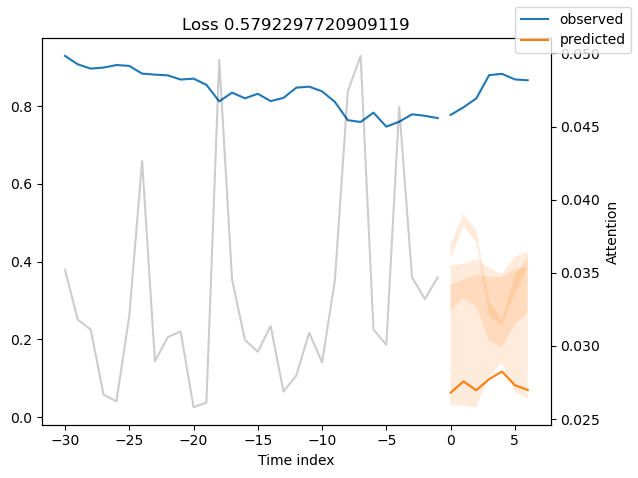

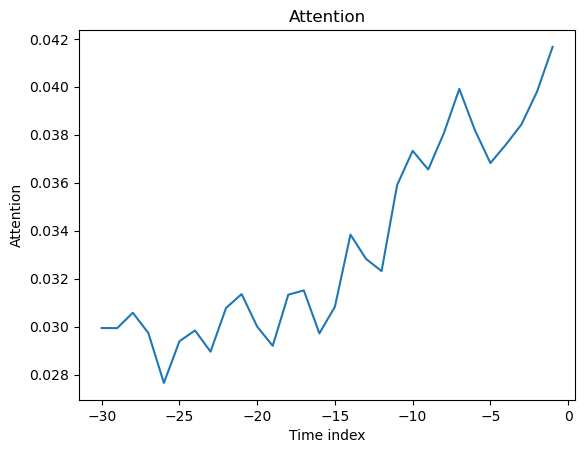

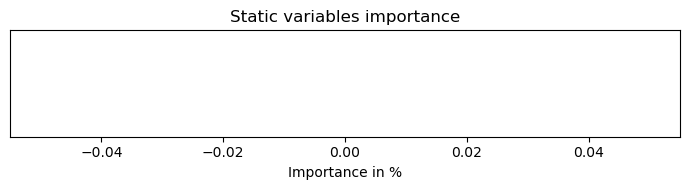

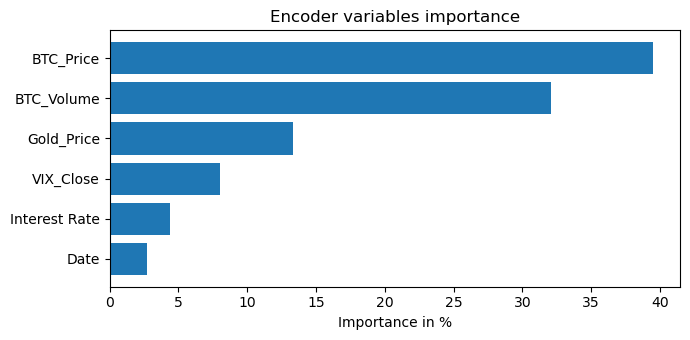

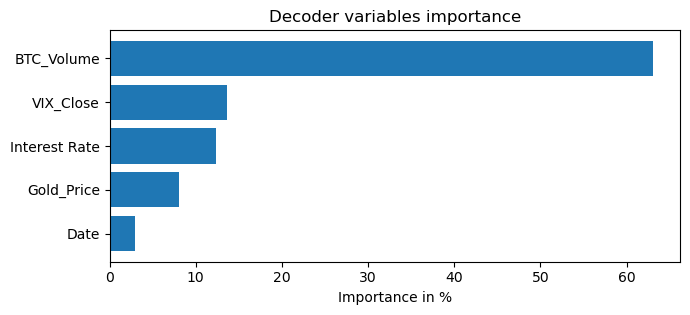

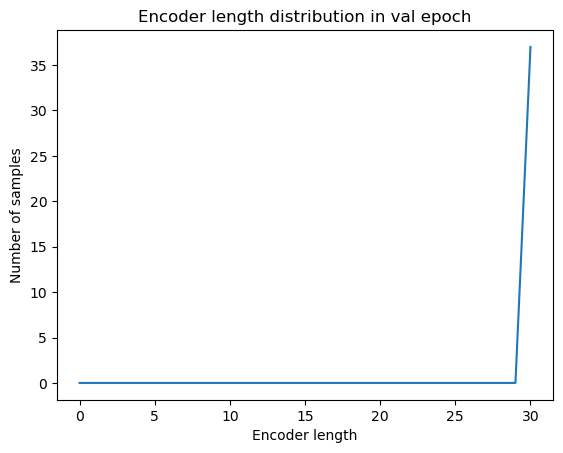

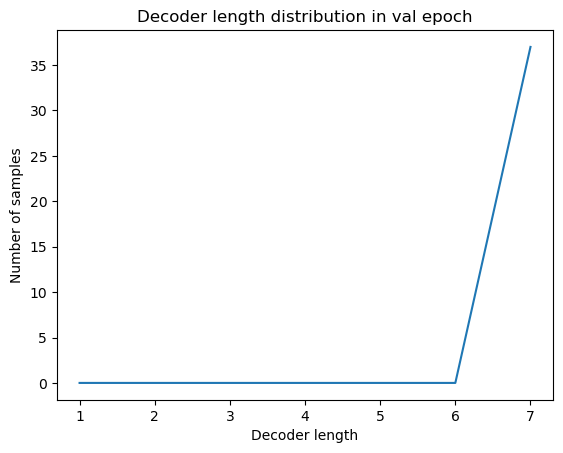

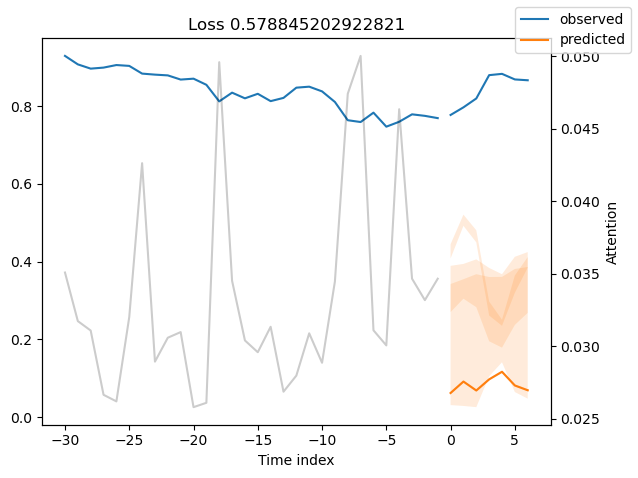

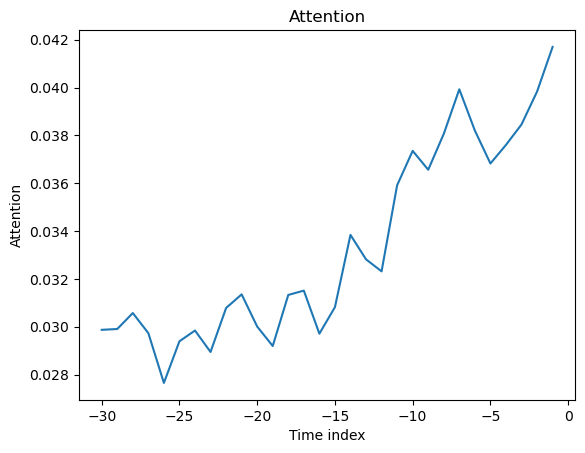

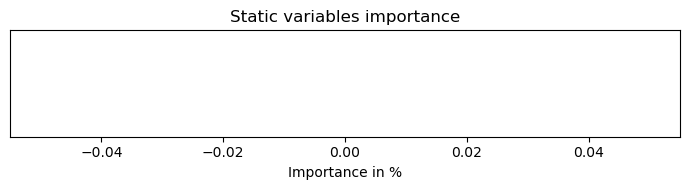

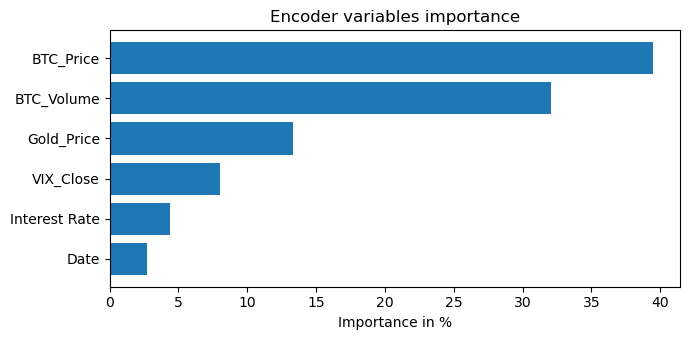

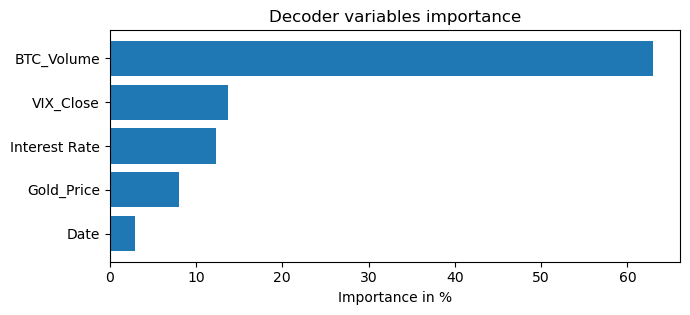

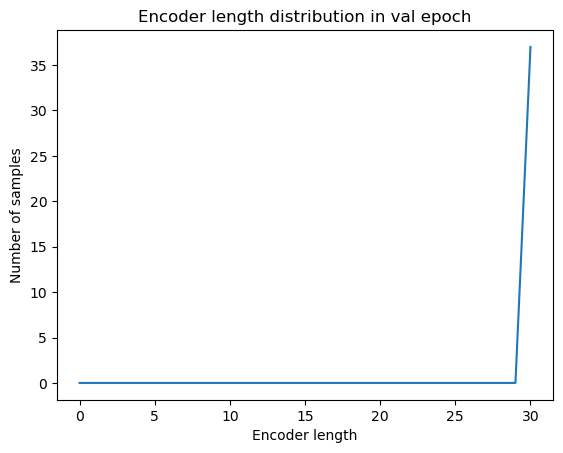

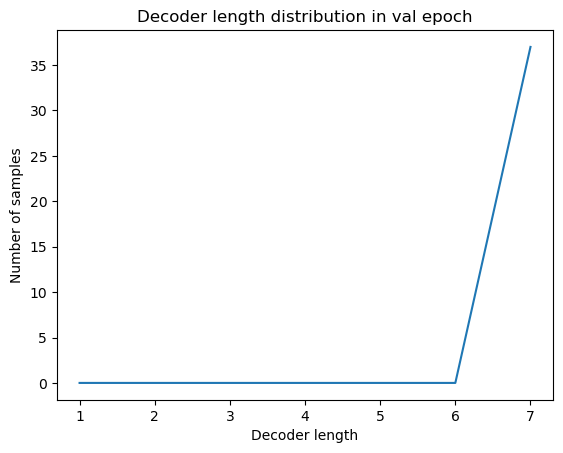

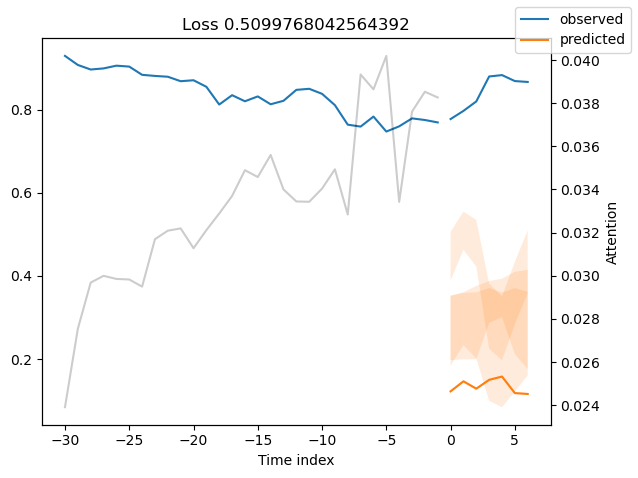

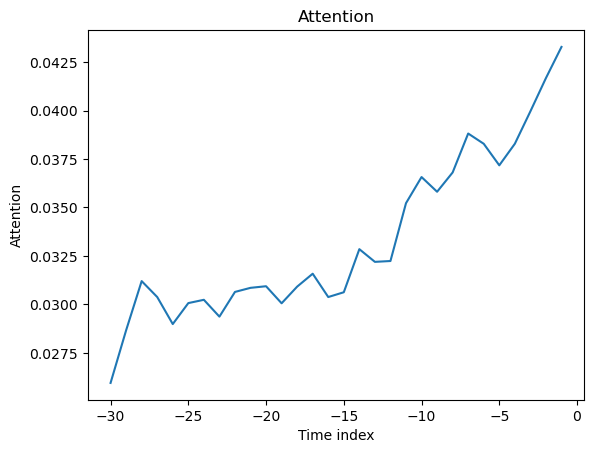

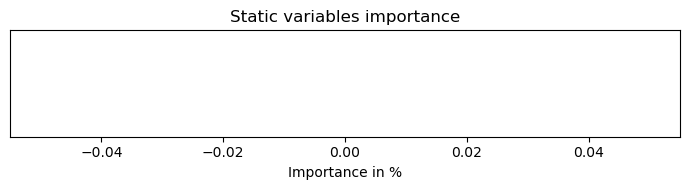

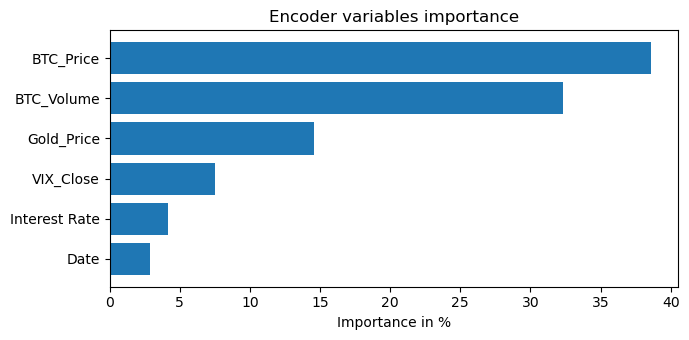

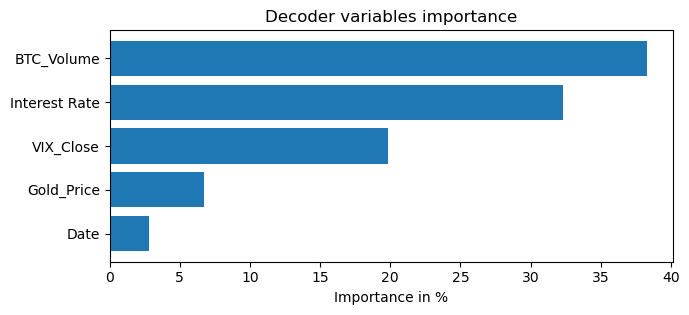

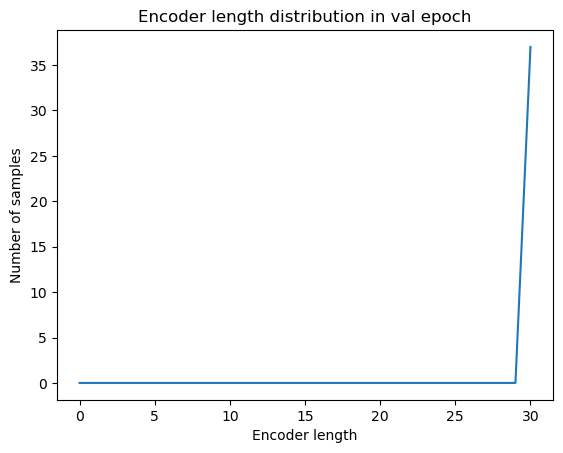

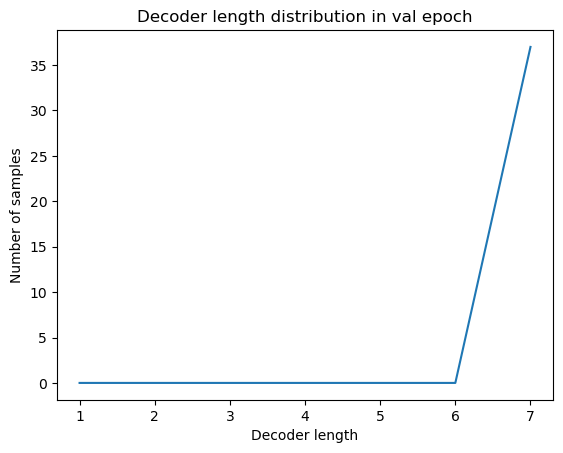

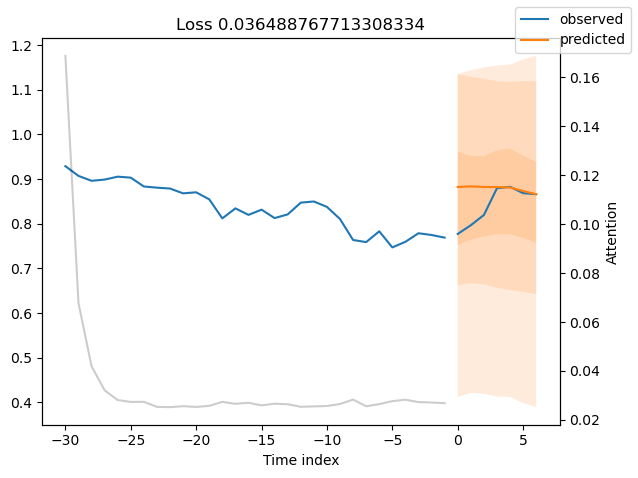

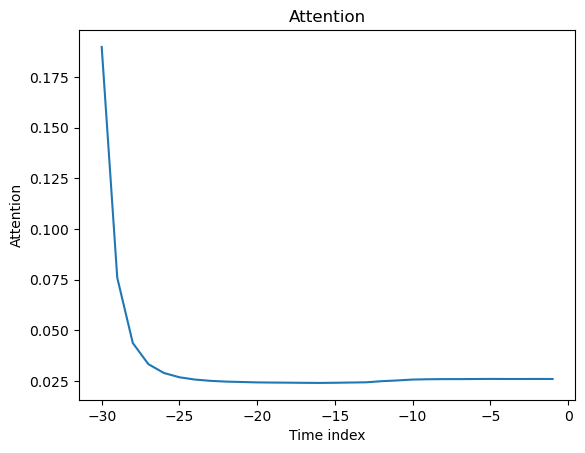

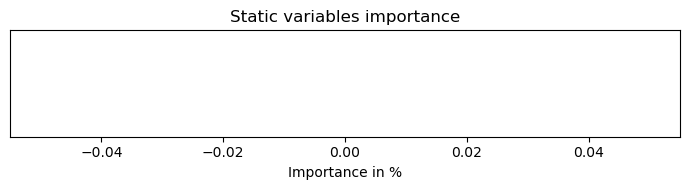

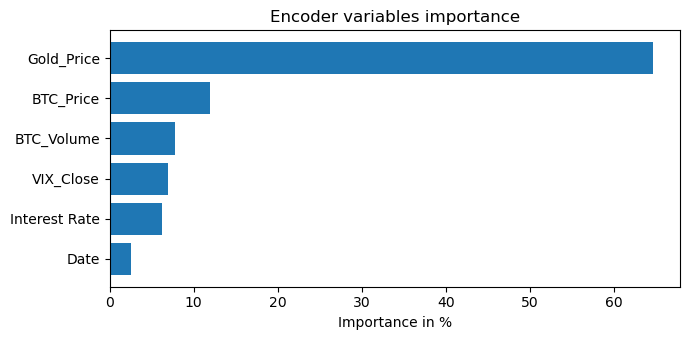

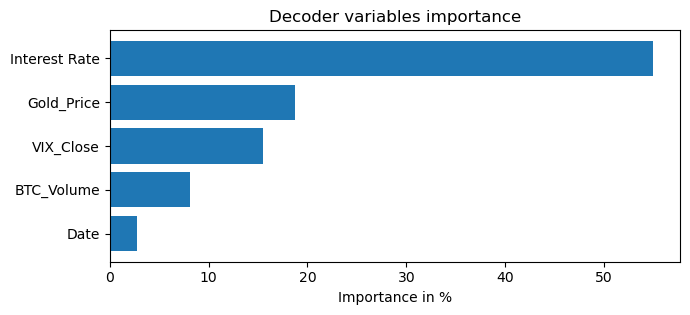

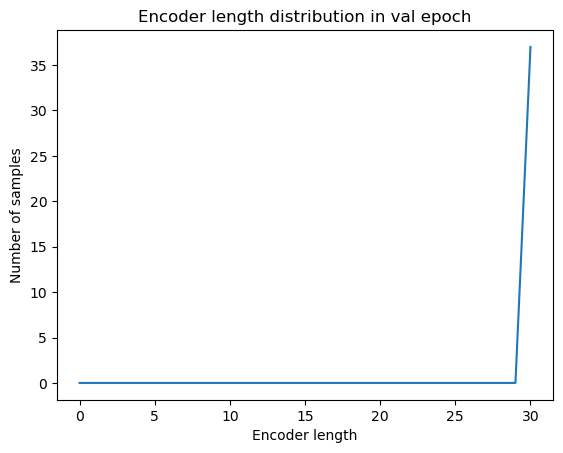

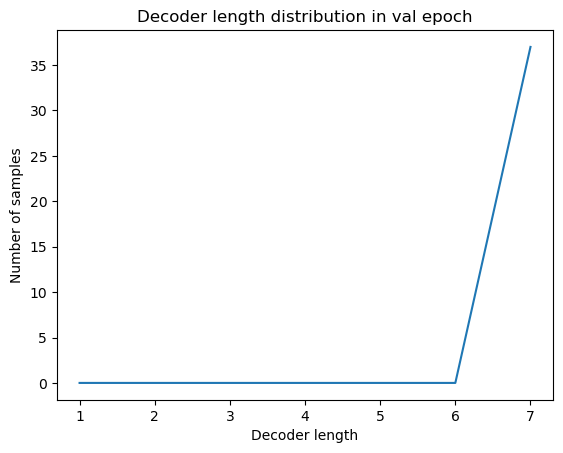

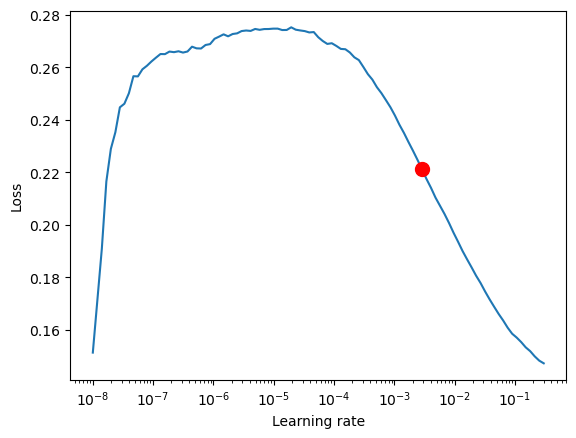

C:\Users\Sathmika\AppData\Local\Temp\ipykernel_3716\3713229593.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [212]:
# find the optimal learning rate
res = Tuner(trainer).lr_find(
    tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader, early_stop_threshold=1000.0, max_lr=0.3,
)
# and plot the result - always visually confirm that the suggested learning rate makes sense
print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

In [213]:
trainer.fit(
    tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader,
)


   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 0      | train
3  | prescalers                         | ModuleDict                      | 192    | train
4  | static_variable_selection          | VariableSelectionNetwork        | 0      | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 11.9 K | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 9.8 K  | train
7  | static_context_variable_selection  | GatedResidualNetwork            | 4.3 K  | train
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 4.3 K  

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

C:\Users\Sathmika\anaconda3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.
C:\Users\Sathmika\anaconda3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.
C:\Users\Sathmika\anaconda3\Lib\site-packages\lightning\pytorch\loops\fit_loop.py:298: The number of training batches (27) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined